In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats
import itertools
import re
import matplotlib.pyplot as plt
import seaborn as sns
import helper

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
isu_pal = [
    "#FF0B04", "#9A3324", "#B9975B", "#707372", "#F1BE48",
    "#FF0B04", "#9A3324", "#B9975B", "#707372", "#F1BE48",
    "#FF0B04", "#9A3324", "#B9975B", "#707372", "#F1BE48",
    "#FF0B04", "#9A3324", "#B9975B", "#707372", "#F1BE48",
    "#FF0B04", "#9A3324", "#B9975B", "#707372", "#F1BE48",
    "#FF0B04", "#9A3324", "#B9975B", "#707372", "#F1BE48"
]
sns.set_theme()
sns.set_context('notebook')
sns.set_palette(sns.color_palette(isu_pal))

In [3]:
reg = linear_model.LinearRegression()

In [4]:
hous_trn = pd.read_csv('train.csv', index_col=0, low_memory=False)

In [5]:
hous_trn.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,528382020,2270,290000,60,RL,92.0,11764,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1,527450110,987,103400,160,RM,21.0,1680,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,909282020,2320,259500,70,RL,61.0,7259,Pave,NaN,IR1,...,0,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal
3,905200010,912,129000,20,RL,NaN,8169,Pave,NaN,Reg,...,0,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal
4,914465020,2052,251000,60,RL,75.0,10125,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [6]:
# Removing the duplicated record has eliminated dulpicates from PID.
hous_trn[hous_trn.PID.duplicated()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [7]:
pd.DataFrame(hous_trn.columns.to_list()).to_csv('vars.csv')

In [8]:
myvar_dict = {'Lot':['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope'], 
         'Neighborhood':['Neighborhood'],
          'Bsmnt':['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 
                   'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'],
         'Bedroom':['BedroomAbvGr'],
         'Porch':['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
         }

In [9]:
myvar = list(itertools.chain(*myvar_dict.values()))

In [10]:
hous_trn[myvar].head()

,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Foundation,BsmtQual,BsmtCond,...,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,92.0,11764,IR1,Lvl,CulDSac,Gtl,NoRidge,PConc,Gd,TA,...,628.0,1152.0,0.0,0.0,4,132,57,0,0,0
1,21.0,1680,Reg,Lvl,Inside,Gtl,BrDale,CBlock,TA,TA,...,25.0,483.0,0.0,1.0,2,52,0,0,0,0
2,61.0,7259,IR1,Lvl,Inside,Mod,Crawfor,CBlock,TA,TA,...,104.0,1028.0,1.0,0.0,3,224,0,0,0,0
3,NaN,8169,Reg,Lvl,Corner,Gtl,Sawyer,CBlock,TA,TA,...,261.0,912.0,1.0,0.0,3,204,0,0,0,0
4,75.0,10125,Reg,Lvl,Inside,Gtl,Mitchel,PConc,Gd,TA,...,412.0,1107.0,0.0,0.0,3,210,91,0,0,0


In [11]:
hous_trn[myvar].dtypes 

LotFrontage      float64
LotArea            int64
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
BsmtFullBath     float64
BsmtHalfBath     float64
BedroomAbvGr       int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
dtype: object

In [12]:
for var in hous_trn[myvar].columns.to_list():
    print(f'{var}: {hous_trn[myvar][var].unique()}')

LotFrontage: [ 92.  21.  61.  nan  75.  67.  42.  78. 138.  24.  60.  64.  77. 105.
  50.  80.  90.  63.  40.  87.  70.  35.  85.  65.  91.  58.  79.  59.
  76.  81. 130.  98.  62.  72.  43.  73.  41.  52. 120.  47. 149.  94.
 110.  68.  55.  88.  82. 144.  48.  74.  45.  53. 113. 107.  34.  46.
  57.  56.  54. 114. 125.  83.  69.  30.  93.  38. 128.  86. 100.  66.
 121.  44.  37.  84.  31.  51.  71.  95.  89. 112. 102.  49.  28. 129.
 195.  36. 123. 152.  99. 200.  96.  32. 109.  39.  97. 124. 116. 313.
 136. 141.  22. 108. 140. 104. 103. 115. 101. 119.  33. 118. 153. 160.
  26. 150. 106. 111. 131.  25.]
LotArea: [11764  1680  7259 ... 16059 22420  3612]
LotShape: ['IR1' 'Reg' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'HLS' 'Low']
LotConfig: ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['NoRidge' 'BrDale' 'Crawfor' 'Sawyer' 'Mitchel' 'CollgCr' 'OldTown'
 'ClearCr' 'NPkVill' 'IDOTRR' 'Edwards' 'NridgHt' 'BrkSide' 'SawyerW'
 'NWAmes' 'Gilbert' 'Som

In [13]:
cols_na = hous_trn[myvar].loc[:,hous_trn[myvar].isna().any(axis=0)].columns.to_list()
cols_na

['LotFrontage',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [14]:
hous_trn = hous_trn.astype({'LotArea':'float64', 'LotShape':'string', 
                 'LandContour':'string', 'LotConfig':'string',
                 'LandSlope':'string', 'Neighborhood':'string',
                 'Foundation':'string', 'BsmtQual':'string',
                 'BsmtCond':'string', 'BsmtExposure':'string', 
                 'BsmtFinType1':'string', 'BsmtFinType2':'string',
                 'BsmtFullBath':'Int64', 'BsmtHalfBath':'Int64',
                 'WoodDeckSF':'float64', 'OpenPorchSF':'float64',
                 'EnclosedPorch':'float64', '3SsnPorch':'float64',
                 'ScreenPorch':'float64'})

In [15]:
hous_trn[myvar].dtypes

LotFrontage      float64
LotArea          float64
LotShape          string
LandContour       string
LotConfig         string
LandSlope         string
Neighborhood      string
Foundation        string
BsmtQual          string
BsmtCond          string
BsmtExposure      string
BsmtFinType1      string
BsmtFinSF1       float64
BsmtFinType2      string
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
BsmtFullBath       Int64
BsmtHalfBath       Int64
BedroomAbvGr       int64
WoodDeckSF       float64
OpenPorchSF      float64
EnclosedPorch    float64
3SsnPorch        float64
ScreenPorch      float64
dtype: object

In [16]:
bsmt_cols = [re.search('Bsmt', col) != None for col in hous_trn.columns]
hous_trn.loc[:,bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,524.0,Unf,0.0,628.0,1152.0,0,0
1,TA,TA,No,LwQ,458.0,Unf,0.0,25.0,483.0,0,1
2,TA,TA,No,ALQ,774.0,LwQ,150.0,104.0,1028.0,1,0
3,TA,TA,No,Rec,216.0,ALQ,435.0,261.0,912.0,1,0
4,Gd,TA,No,ALQ,445.0,BLQ,250.0,412.0,1107.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1930,Gd,TA,No,Unf,0.0,Unf,0.0,1264.0,1264.0,0,0
1931,TA,TA,No,Unf,0.0,Unf,0.0,718.0,718.0,0,0
1932,Gd,TA,No,Unf,0.0,Unf,0.0,1288.0,1288.0,0,0
1933,Gd,TA,No,BLQ,1128.0,Unf,0.0,242.0,1370.0,1,0


In [17]:
hous_trn[hous_trn['BsmtHalfBath'].isna()].loc[:,bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
619,<NA>,<NA>,<NA>,<NA>,0.0,<NA>,0.0,0.0,0.0,<NA>,<NA>
1825,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,<NA>,<NA>


In [18]:
hous_trn.iloc[[1825]]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1825,903230120,896,79000,20,RM,99.0,5940.0,Pave,NaN,IR1,...,0.0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [19]:
hous_trn[(hous_trn['TotalBsmtSF'].isna()) | (hous_trn['TotalBsmtSF']==0)].shape

(56, 81)

In [20]:
bsmt_df1 = hous_trn[(hous_trn['TotalBsmtSF'].isna()) | (hous_trn['TotalBsmtSF']==0)]

In [21]:
hous_trn[hous_trn['BsmtQual'].isna()].shape

(56, 81)

In [22]:
bsmt_df2 = hous_trn[hous_trn['BsmtQual'].isna()]

In [23]:
bsmt_df3 = bsmt_df1.merge(bsmt_df2, how='outer', indicator=True)
bsmt_df3[bsmt_df3['_merge']!='both']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,_merge


In [24]:
hous_trn[(hous_trn['BsmtQual'].isna()) & (hous_trn['TotalBsmtSF']!=0)].loc[:,[re.search('Bsmt', col) != None for col in hous_trn.columns]].shape

(1, 11)

In [25]:
hous_trn['BsmtQual'].unique()

<StringArray>
['Gd', 'TA', <NA>, 'Ex', 'Fa', 'Po']
Length: 6, dtype: string

In [26]:
hous_trn = hous_trn.fillna(value={'BsmtQual':'None'})

In [27]:
hous_trn['BsmtQual'].unique()

<StringArray>
['Gd', 'TA', 'None', 'Ex', 'Fa', 'Po']
Length: 6, dtype: string

In [28]:
BsmtQual_dict = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

In [29]:
hous_trn['BQ_score'] = [BsmtQual_dict[cell] for cell in hous_trn['BsmtQual']]

In [30]:
hous_trn['BsmtCond'].unique()

<StringArray>
['TA', 'Fa', <NA>, 'Gd', 'Ex', 'Po']
Length: 6, dtype: string

In [31]:
hous_trn = hous_trn.fillna(value={'BsmtCond':'None'})

In [32]:
hous_trn['BsmtCond'].unique()

<StringArray>
['TA', 'Fa', 'None', 'Gd', 'Ex', 'Po']
Length: 6, dtype: string

In [33]:
BsmtCond_dict = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

In [34]:
hous_trn['BC_score'] = [BsmtCond_dict[cell] for cell in hous_trn['BsmtCond']]

In [35]:
hous_trn['BsmtExposure'].unique()

<StringArray>
['No', 'Av', 'Mn', <NA>, 'Gd']
Length: 5, dtype: string

In [36]:
hous_trn = hous_trn.fillna(value={'BsmtExposure':'None'})

In [37]:
hous_trn['BsmtExposure'].unique()

<StringArray>
['No', 'Av', 'Mn', 'None', 'Gd']
Length: 5, dtype: string

In [38]:
BsmtExp_dict = {'None':0, 'No':0, 'Mn':1, 'Av':2, 'Gd':3}

In [39]:
hous_trn['BE_score'] = [BsmtExp_dict[cell] for cell in hous_trn['BsmtExposure']]

In [40]:
hous_trn['BsmtFinType1'].unique()

<StringArray>
['GLQ', 'LwQ', 'ALQ', 'Rec', 'Unf', <NA>, 'BLQ']
Length: 7, dtype: string

In [41]:
hous_trn = hous_trn.fillna(value={'BsmtFinType1':'None'})

In [42]:
BsmtFT1_dict = {'None':0, 'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5}

In [43]:
hous_trn['BFT1_score'] = [BsmtFT1_dict[cell] for cell in hous_trn['BsmtFinType1']]

In [44]:
hous_trn['BsmtFinType2'].unique()

<StringArray>
['Unf', 'LwQ', 'ALQ', 'BLQ', <NA>, 'Rec', 'GLQ']
Length: 7, dtype: string

In [45]:
hous_trn = hous_trn.fillna(value={'BsmtFinType2':'None'})

In [46]:
BsmtFT2_dict = BsmtFT1_dict

In [47]:
hous_trn['BFT2_score'] = [BsmtFT2_dict[cell] for cell in hous_trn['BsmtFinType2']]

In [48]:
hous_trn = hous_trn.fillna(value={'BsmtFinSF1':0, 'BsmtFinSF2':0, 'BsmtUnfSF':0, 'TotalBsmtSF':0})

In [49]:
hous_trn['TotalBsmtSF_calc'] = hous_trn['BsmtFinSF1'] + hous_trn['BsmtFinSF2'] + hous_trn['BsmtUnfSF']

In [50]:
hous_trn.loc[:,['TotalBsmtSF','TotalBsmtSF_calc']]

,TotalBsmtSF,TotalBsmtSF_calc
0,1152.0,1152.0
1,483.0,483.0
2,1028.0,1028.0
3,912.0,912.0
4,1107.0,1107.0
...,...,...
1930,1264.0,1264.0
1931,718.0,718.0
1932,1288.0,1288.0
1933,1370.0,1370.0


In [51]:
hous_trn[hous_trn['TotalBsmtSF']!=hous_trn['TotalBsmtSF_calc']]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,MoSold,YrSold,SaleType,SaleCondition,BQ_score,BC_score,BE_score,BFT1_score,BFT2_score,TotalBsmtSF_calc


In [52]:
hous_trn[(hous_trn['BQ_score']!=0) & (hous_trn['TotalBsmtSF']==0)]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,MoSold,YrSold,SaleType,SaleCondition,BQ_score,BC_score,BE_score,BFT1_score,BFT2_score,TotalBsmtSF_calc


In [53]:
BQ_score = hous_trn['BQ_score']
BC_score = hous_trn['BC_score']
BE_score = hous_trn['BE_score']
BsmtFinSF1 = hous_trn['BsmtFinSF1']
BsmtFinSF2 = hous_trn['BsmtFinSF2']
TotalBsmtSF = hous_trn['TotalBsmtSF']
BFT1_score = hous_trn['BFT1_score']
BFT2_score = hous_trn['BFT2_score']

new_col = []
for i in range(len(hous_trn)):
    if BQ_score[i] == 0:
        new_col.append(0)
    else:
        new_col.append(
            BQ_score[i] * (
                (1 + BC_score[i]/10)*(1 + BE_score[i]/10)*(
                    1 + ((BsmtFinSF1[i] + BsmtFinSF2[i])/TotalBsmtSF[i])*(1 + BFT1_score[i]/10)*(1 + BFT2_score[i]/100)
                )
            )
        )
    
hous_trn['BsmtScore'] = new_col

In [54]:
hous_trn['BsmtScore'].describe()

count    1935.000000
mean        8.088807
std         4.017244
min         0.000000
25%         5.200000
50%         7.414548
75%        10.722397
max        20.904805
Name: BsmtScore, dtype: float64

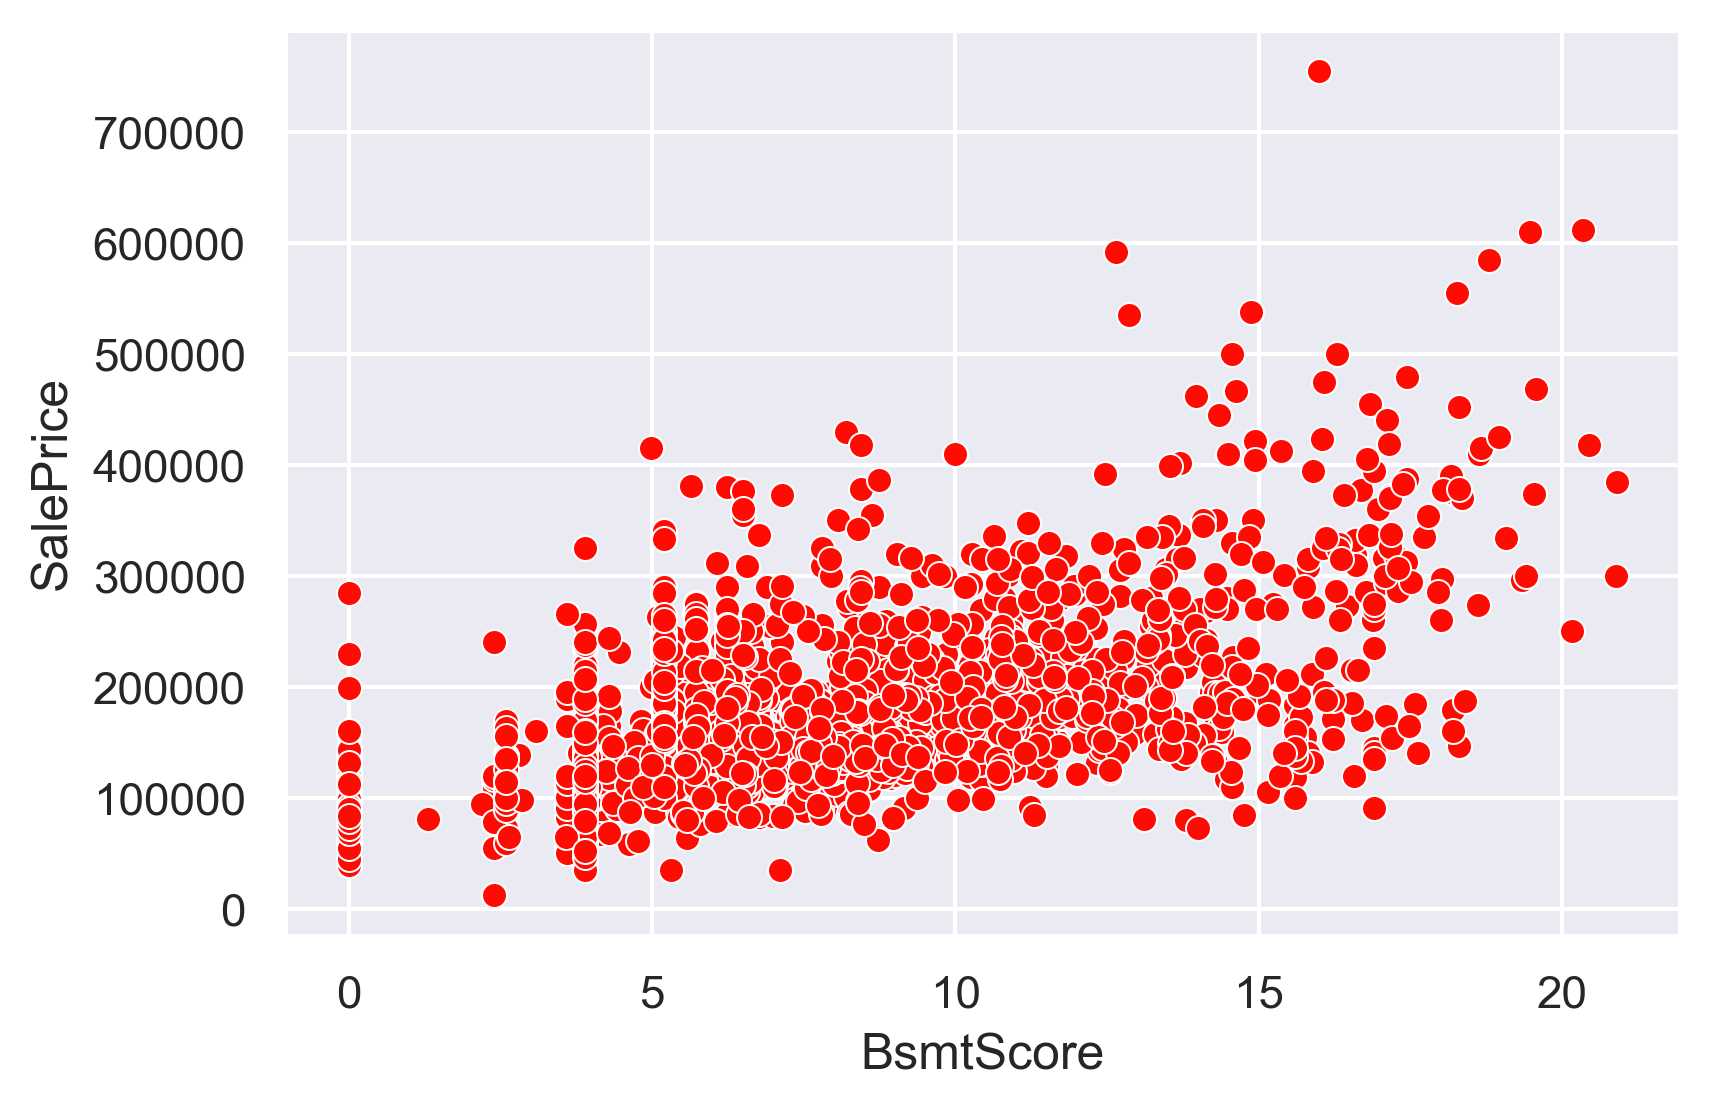

In [55]:
x = hous_trn['BsmtScore']
y = hous_trn['SalePrice']
sns.scatterplot(x=x, y=y)
plt.show()

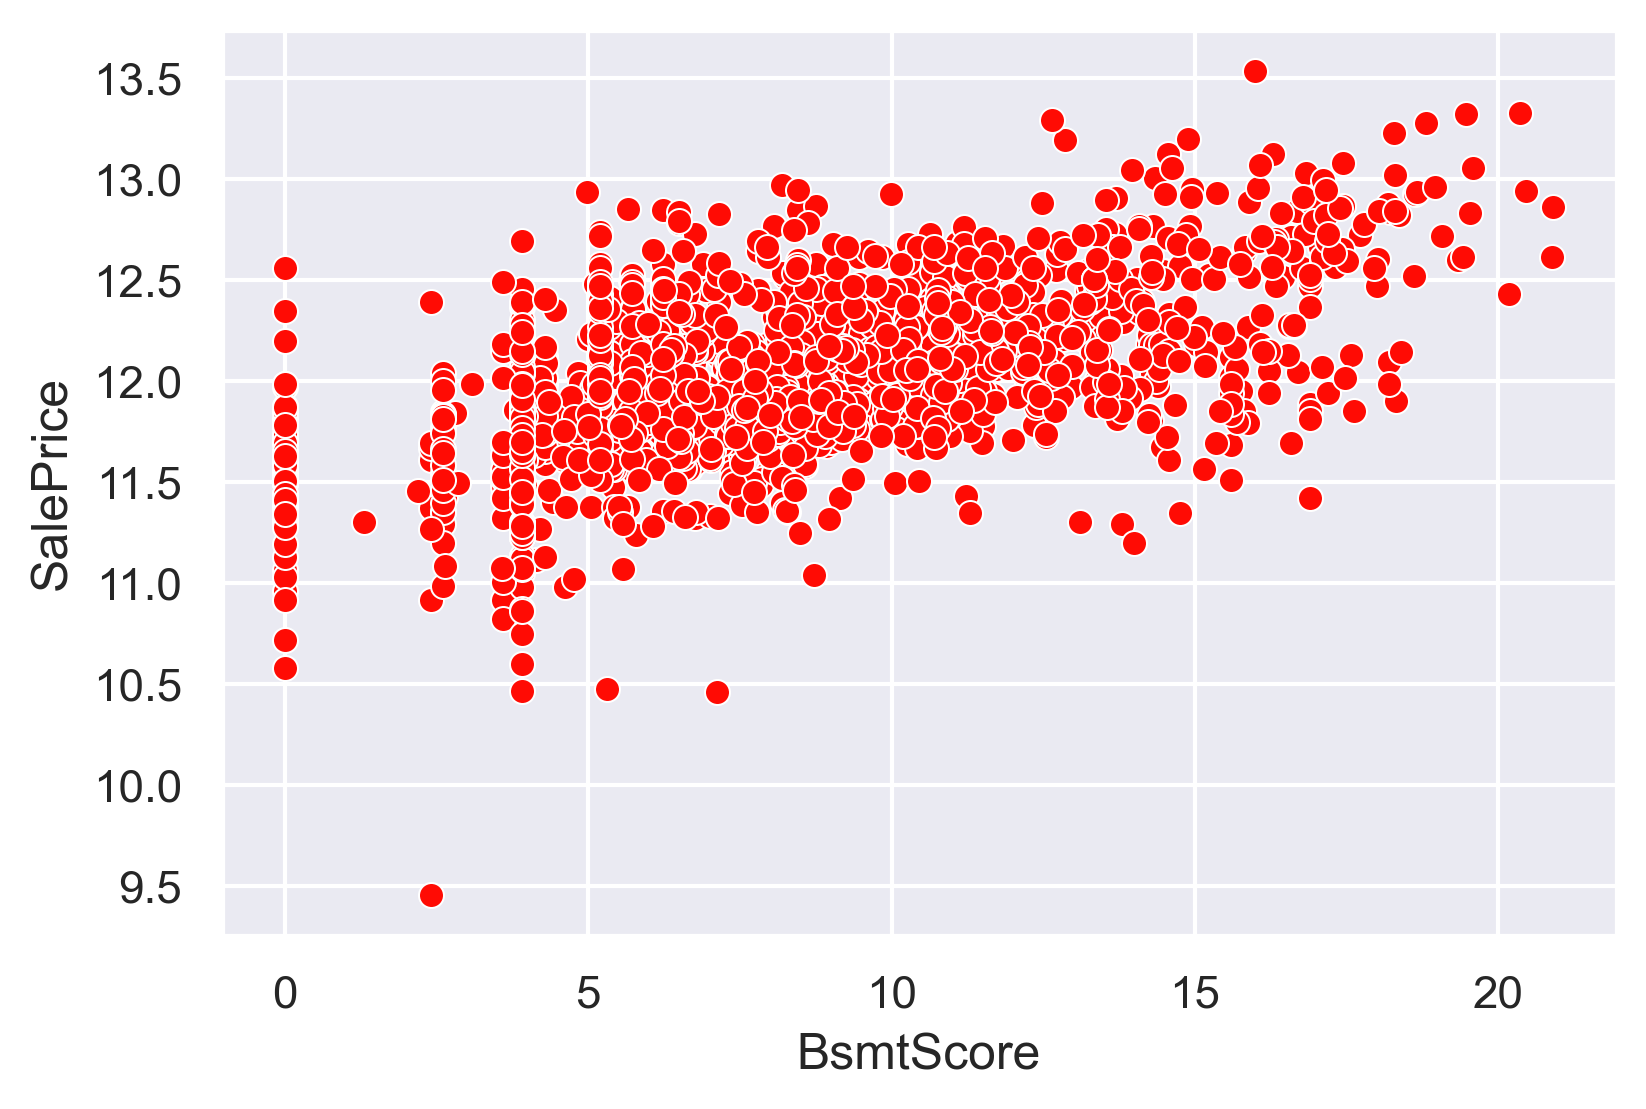

In [56]:
x = hous_trn['BsmtScore']
y = np.log(hous_trn['SalePrice'])
sns.scatterplot(x=x, y=y)
plt.show()

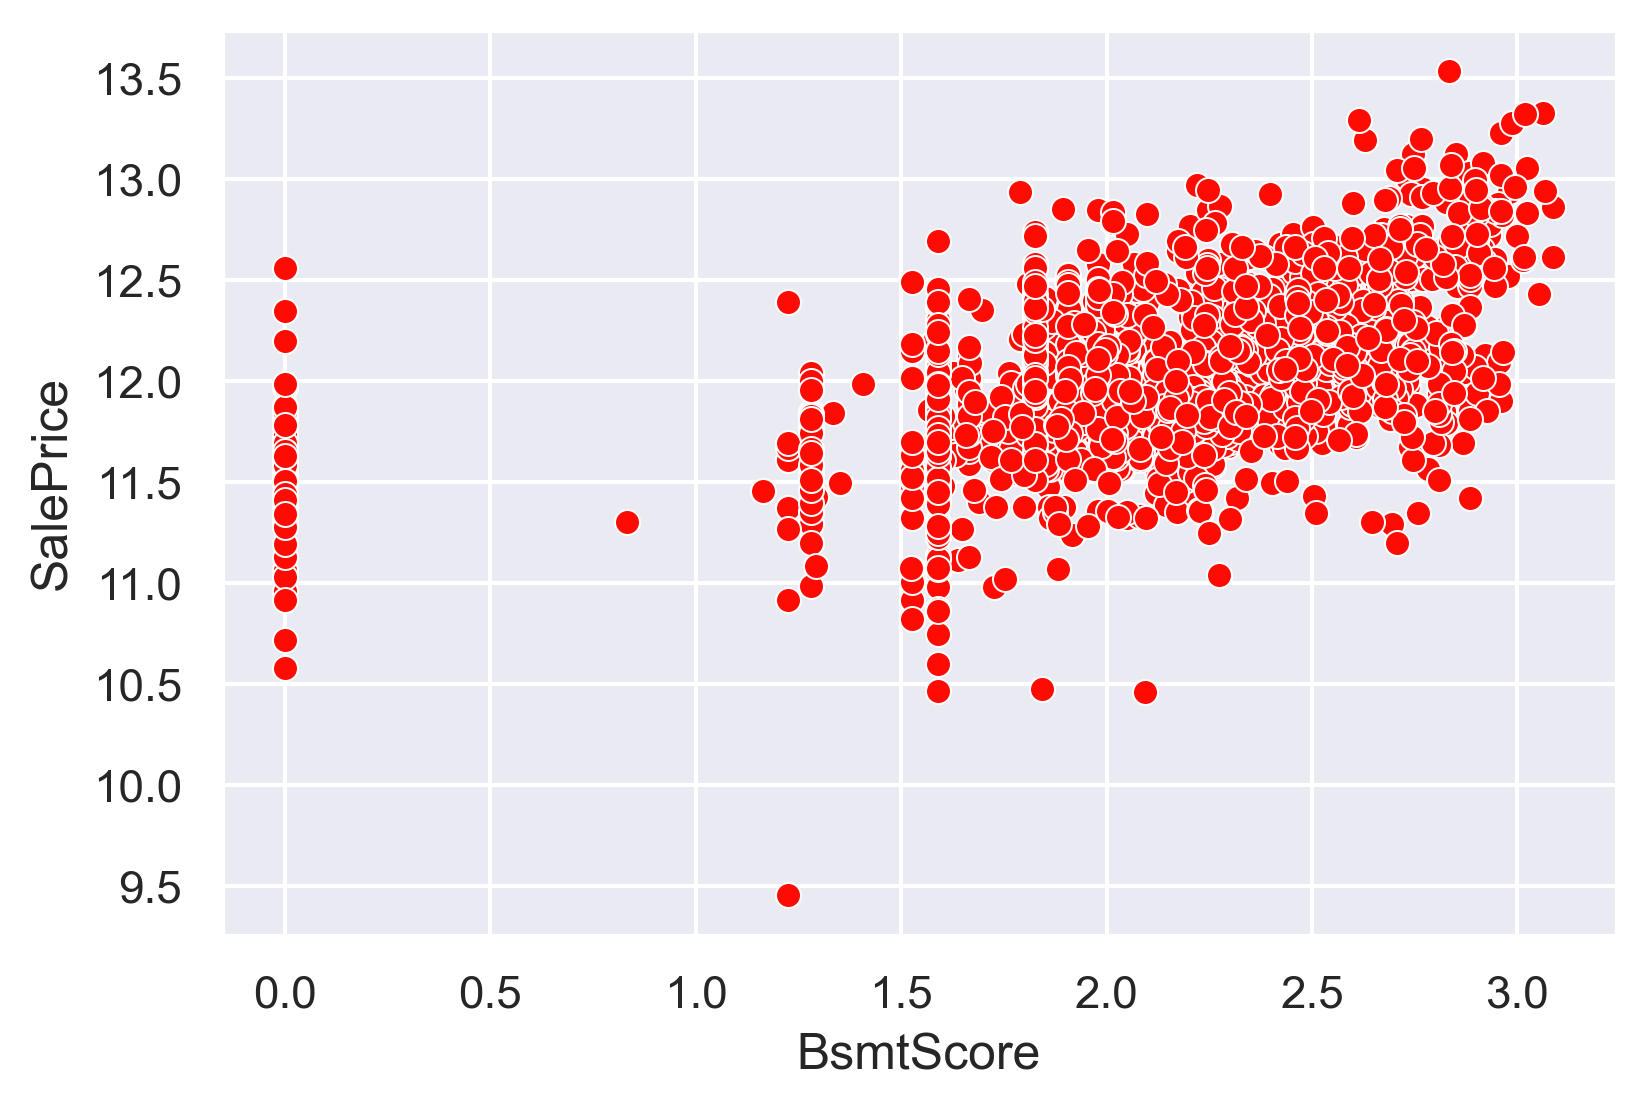

In [57]:
x = np.log(1+hous_trn['BsmtScore'])
y = np.log(hous_trn['SalePrice'])
sns.scatterplot(x=x, y=y)
plt.show()

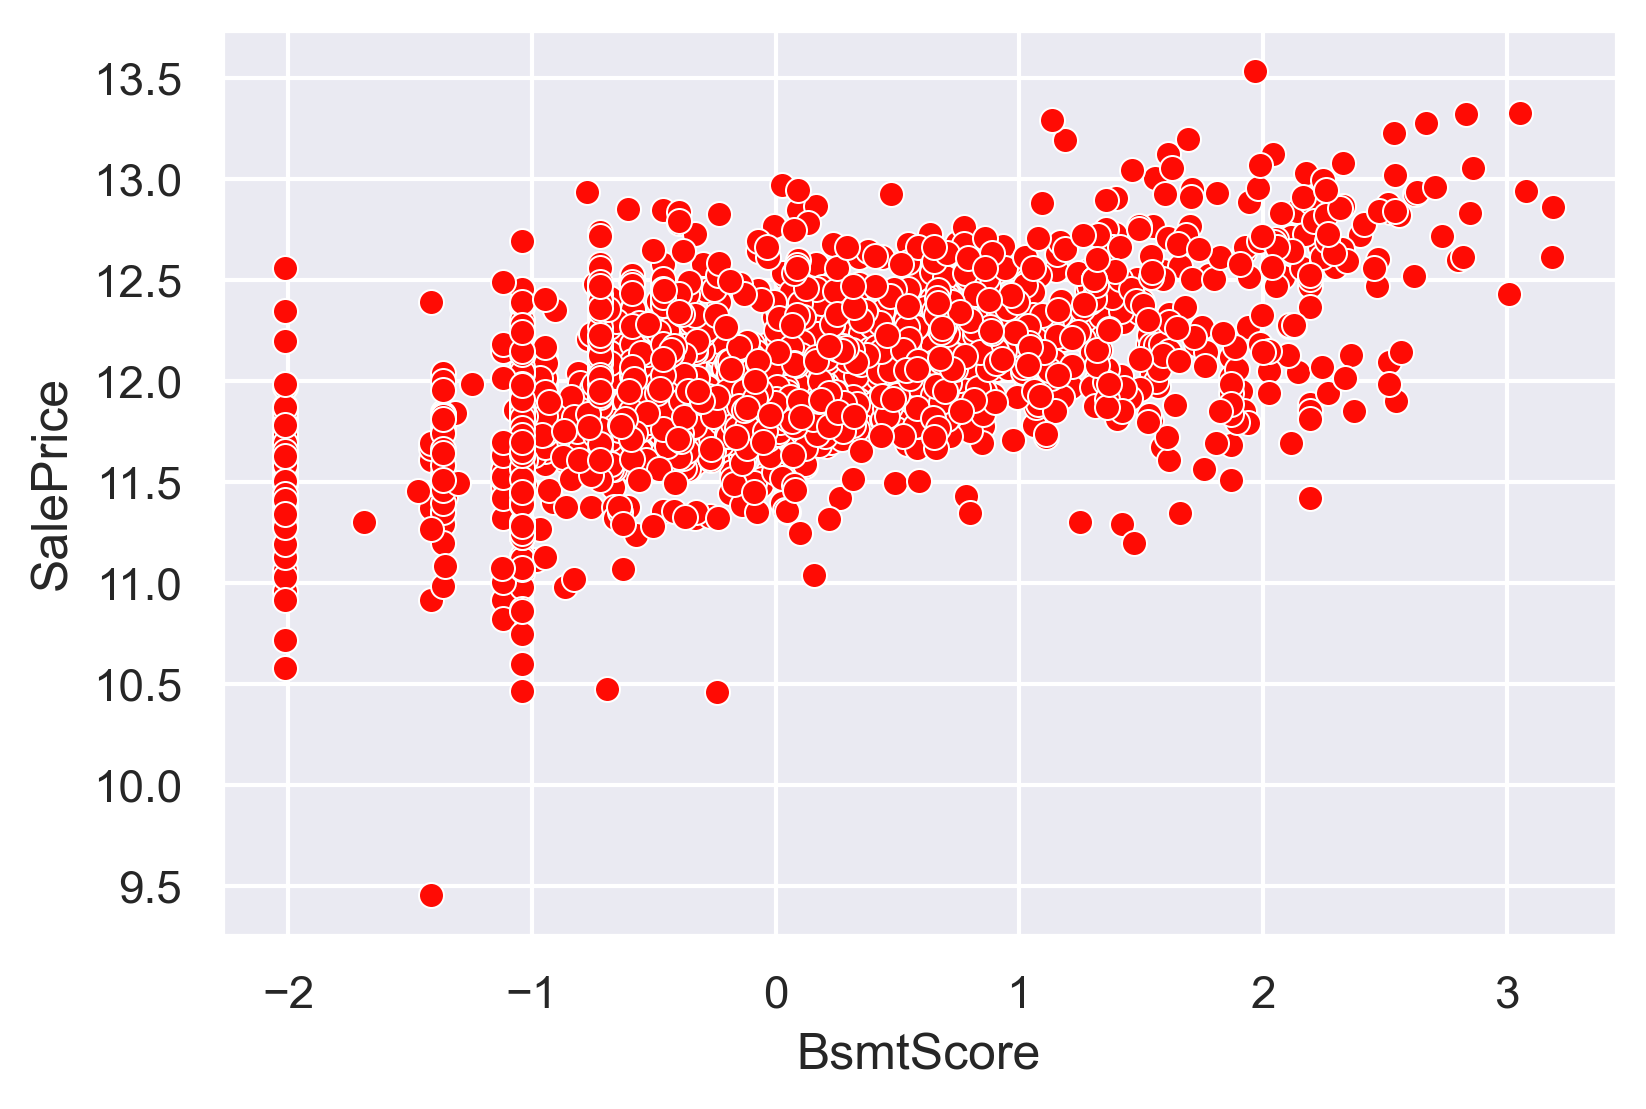

In [58]:
x = (hous_trn['BsmtScore']-np.mean(hous_trn['BsmtScore']))/np.std(hous_trn['BsmtScore'])
y = np.log(hous_trn['SalePrice'])
sns.scatterplot(x=x, y=y)
plt.show()

In [59]:
hous_trn['BsmtScore'] = (hous_trn['BsmtScore']-np.mean(hous_trn['BsmtScore']))/np.std(hous_trn['BsmtScore'])
hous_trn['BsmtSize'] = (hous_trn['TotalBsmtSF']-np.mean(hous_trn['TotalBsmtSF']))/np.std(hous_trn['TotalBsmtSF'])

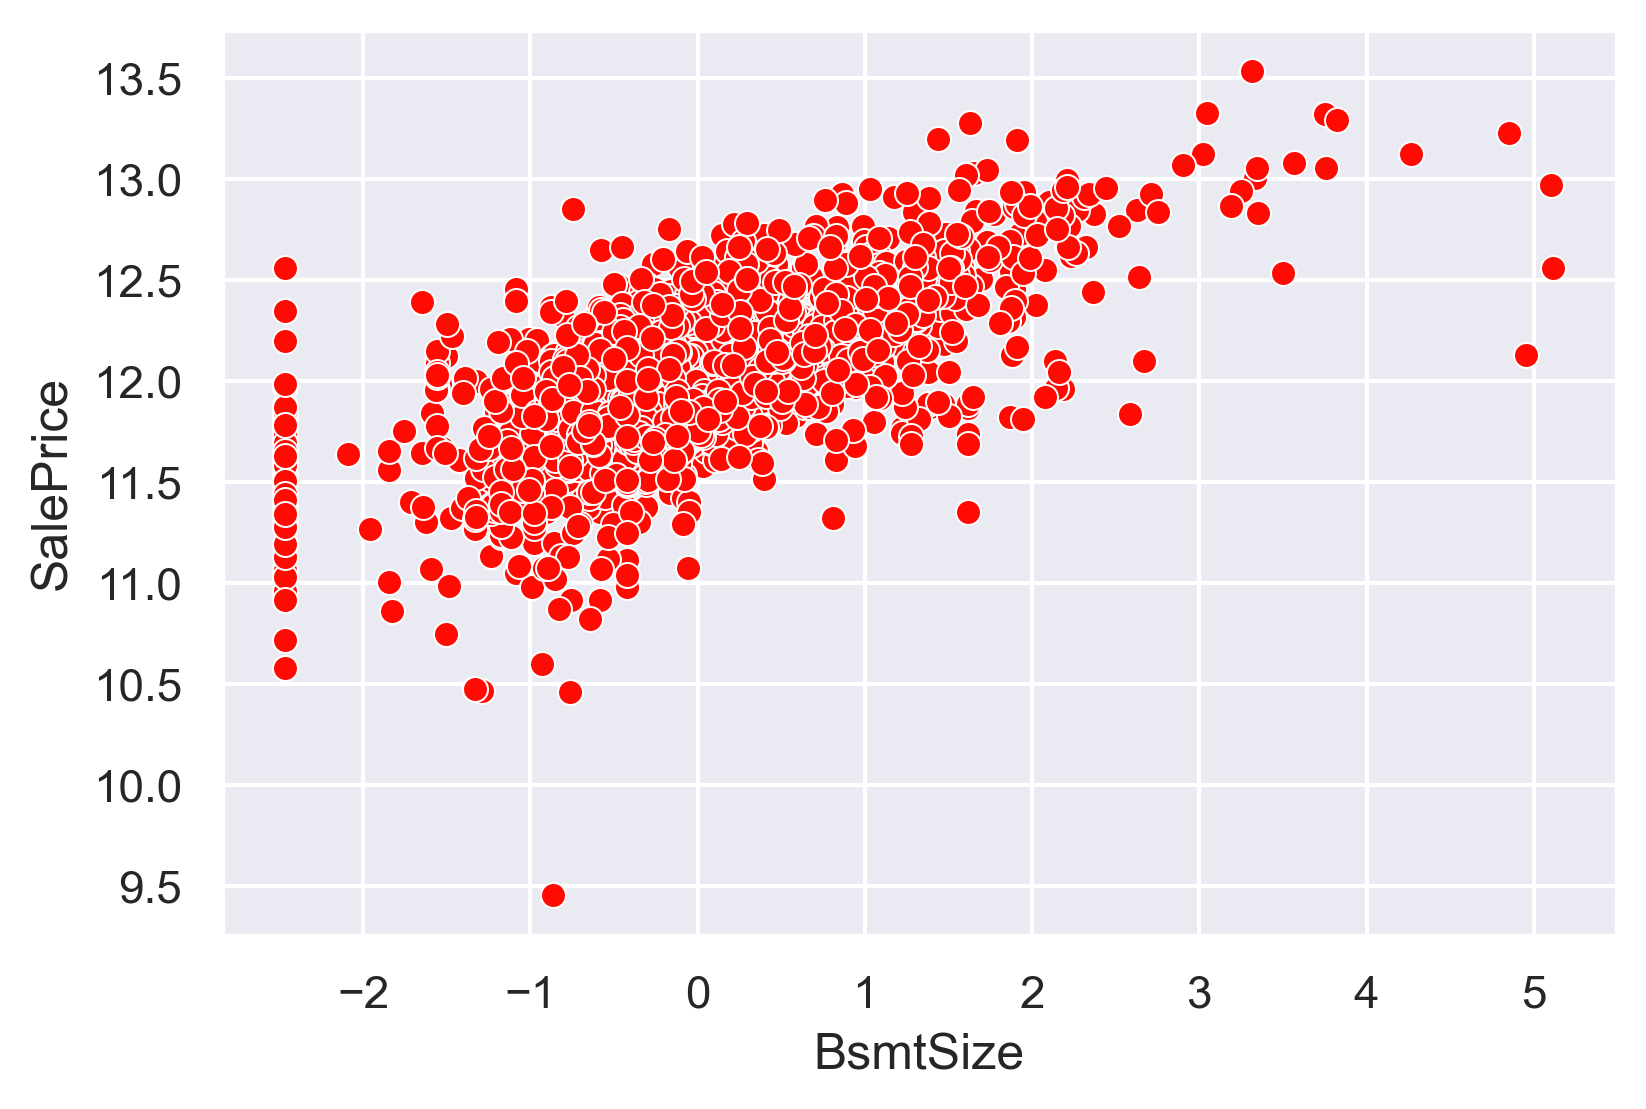

In [60]:
x = hous_trn['BsmtSize']
y = np.log(hous_trn['SalePrice'])
sns.scatterplot(x=x, y=y)
plt.show()

In [61]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.4894731721035621

In [62]:
hous_trn['BsmtInt'] = hous_trn['BsmtScore']*hous_trn['BsmtSize']

In [63]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtInt']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.4996028245953327

In [64]:
hous_trn['BsmtScore2'] = hous_trn['BsmtScore']**2
hous_trn['BsmtSize2'] = hous_trn['BsmtSize']**2

In [65]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtScore2', 'BsmtSize2', 'BsmtInt']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.5014952232062034

In [66]:
X = hous_trn.loc[:, ['BsmtScore']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.29006790171229446

In [67]:
X = hous_trn.loc[:, ['BsmtSize']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.42205246511801964

In [68]:
X = hous_trn.loc[:, ['BsmtSize', 'BsmtSize2']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.4229617875410113

In [69]:
X = np.log(1+hous_trn.loc[:, ['TotalBsmtSF']])
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.141979792582814

In [70]:
hous_trn = hous_trn.fillna(value={'BsmtFullBath':0, 'BsmtHalfBath':0})

In [71]:
hous_trn['BsmtBathScore'] = stats.zscore(1*hous_trn['BsmtFullBath'] + (1/2)*hous_trn['BsmtHalfBath'])

In [72]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtScore2', 'BsmtSize2', 'BsmtInt', 'BsmtBathScore']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.5144867999703528

In [73]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtScore2', 'BsmtSize2', 'BsmtInt', 'BsmtFullBath', 'BsmtHalfBath']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.5159862041802974

In [74]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtInt', 'BsmtBathScore']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.511233189724658

In [75]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtInt', 'BsmtFullBath', 'BsmtHalfBath']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.5127109917311263

In [76]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtBathScore']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.5002625286618914

In [77]:
LotFront = hous_trn['LotFrontage']
LotArea = hous_trn['LotArea']

new_col = []
for i in range(len(hous_trn)):
    if np.isnan(LotFront[i]):
        new_col.append(np.sqrt(LotArea[i]/3))
    else:
        new_col.append(LotFront[i])
    
hous_trn['LotFrontage'] = new_col

In [78]:
hous_trn['LotFrontage'] = stats.zscore(hous_trn['LotFrontage'])

In [79]:
hous_trn['LotArea'] = stats.zscore(hous_trn['LotArea'])

In [80]:
X = hous_trn.loc[:, ['LotFrontage']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.09544842700017087

In [81]:
X = hous_trn.loc[:, ['LotArea']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.09334347926123265

In [82]:
X = hous_trn.loc[:, ['LotFrontage', 'LotArea']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.1207468552447225

In [83]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtBathScore', 'LotFrontage', 'LotArea']]
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)


0.5284709131052713

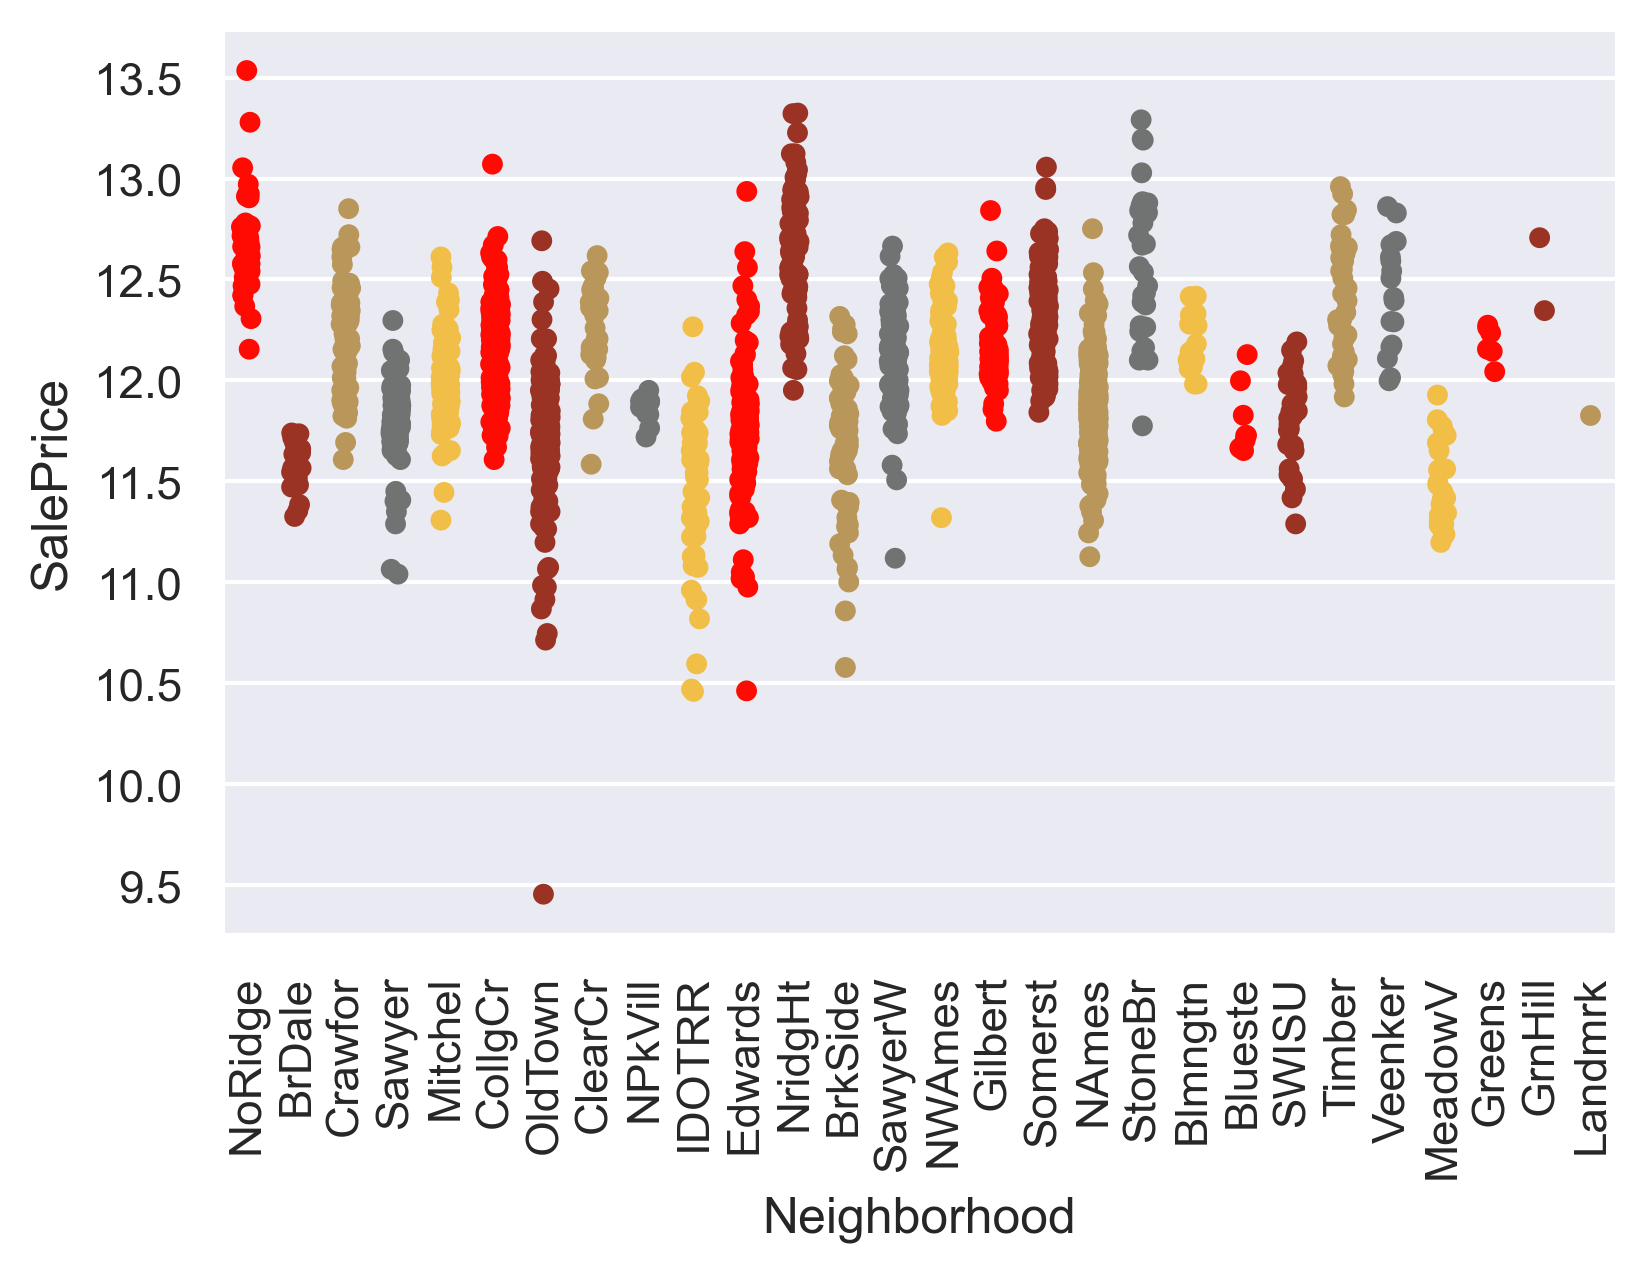

In [102]:
x = hous_trn['Neighborhood']
y = np.log(hous_trn['SalePrice'])
_ = sns.stripplot(x=x, y=y)
_.tick_params(axis='x', rotation=90)
plt.show()

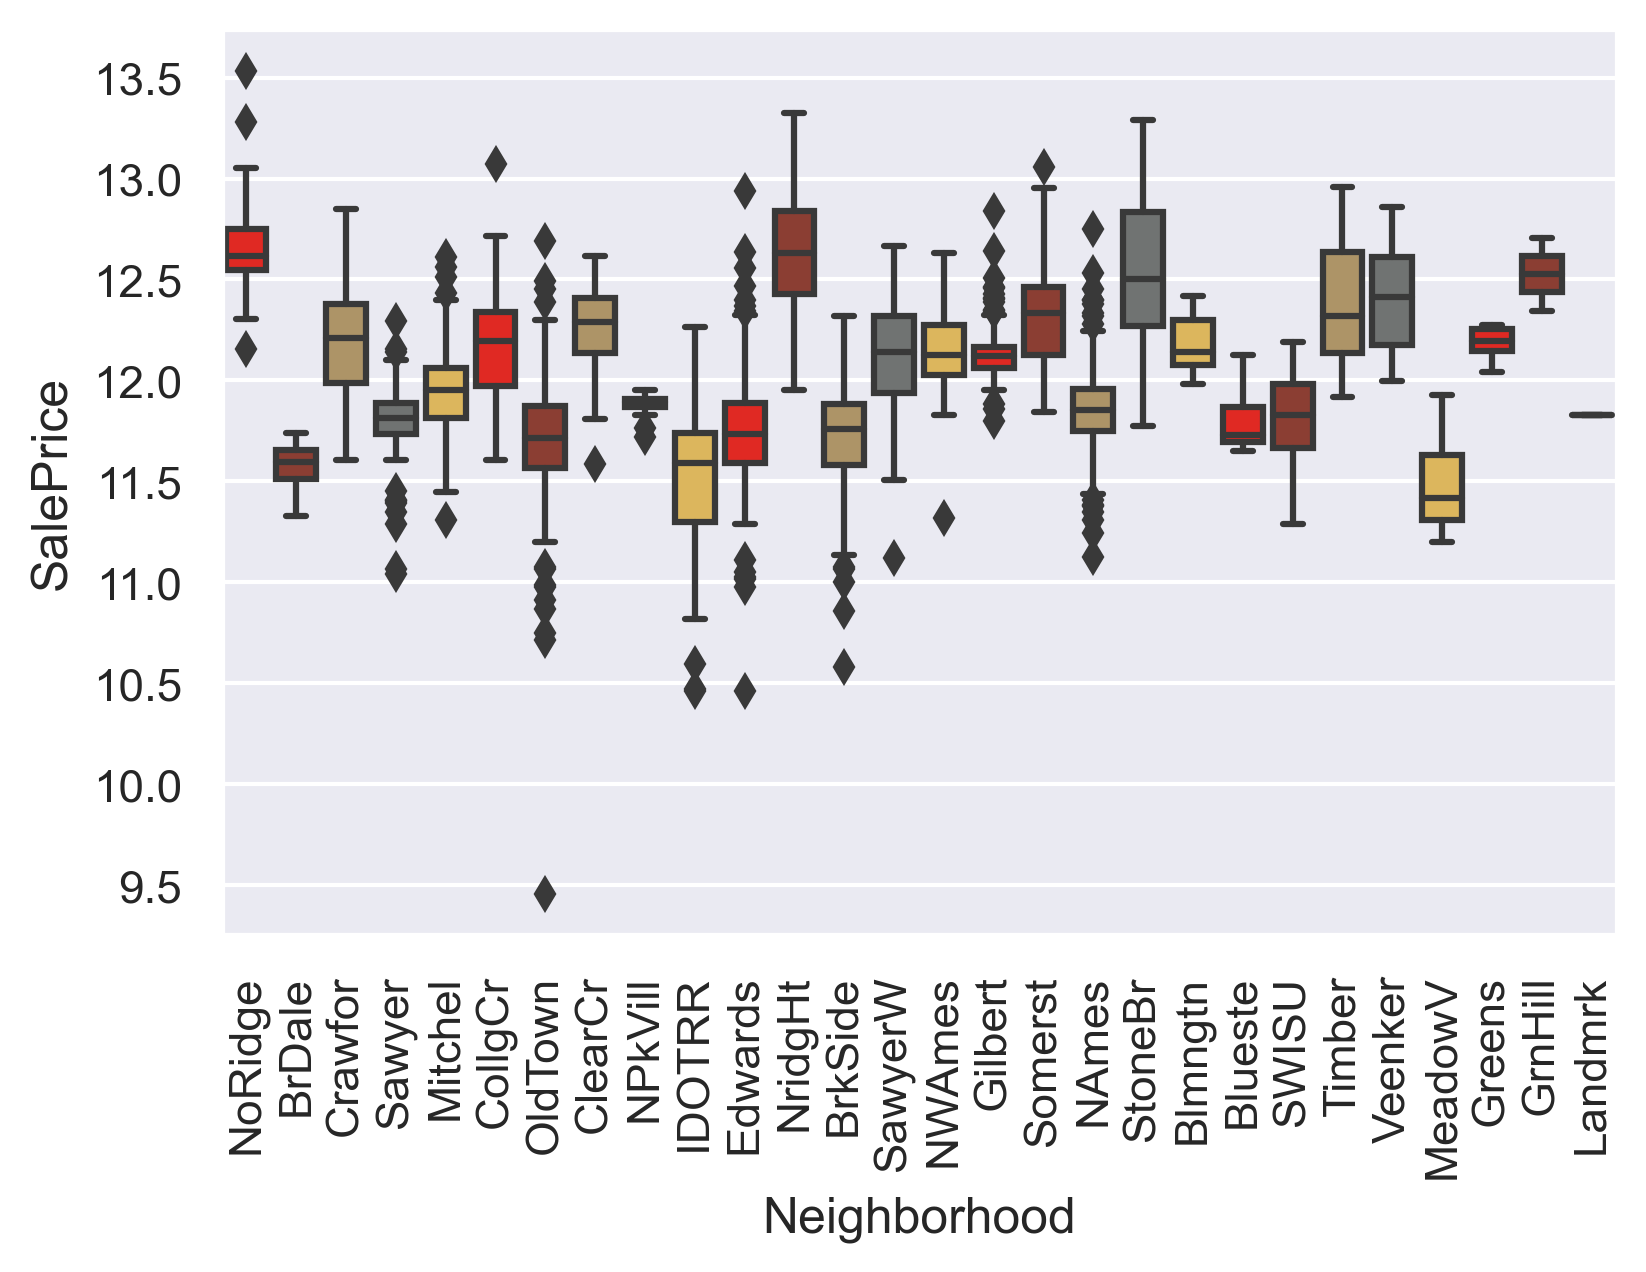

In [104]:
x = hous_trn['Neighborhood']
y = np.log(hous_trn['SalePrice'])
_ = sns.boxplot(x=x, y=y)
_.tick_params(axis='x', rotation=90)
plt.show()

In [109]:
pd.options.display.max_columns = None
hous_trn[hous_trn['Neighborhood']=='OldTown'].sort_values('SalePrice').loc[[1586]]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BQ_score,BC_score,BE_score,BFT1_score,BFT2_score,TotalBsmtSF_calc,BsmtScore,BsmtSize,BsmtInt,BsmtScore2,BsmtSize2,BsmtBathScore
1586,902207130,832,12789,30,RM,0.053411,-0.062833,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml,2,2,0,0,0,678.0,-1.416463,-0.864786,1.224938,2.006368,0.747855,-0.922486


In [97]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtBathScore', 'LotFrontage', 'LotArea', 'Neighborhood']]
transformer = ColumnTransformer([("Cat", OneHotEncoder(drop='first'), ['Neighborhood'])], remainder='passthrough', sparse_threshold=0)
X = transformer.fit_transform(X)
rename_dict = dict(zip(pd.DataFrame(X).columns, transformer.get_feature_names()))
X = pd.DataFrame(X).rename(columns=rename_dict)
pd.DataFrame(X).head()

,Cat__x0_Blueste,Cat__x0_BrDale,Cat__x0_BrkSide,Cat__x0_ClearCr,Cat__x0_CollgCr,Cat__x0_Crawfor,Cat__x0_Edwards,Cat__x0_Gilbert,Cat__x0_Greens,Cat__x0_GrnHill,...,Cat__x0_SawyerW,Cat__x0_Somerst,Cat__x0_StoneBr,Cat__x0_Timber,Cat__x0_Veenker,BsmtScore,BsmtSize,BsmtBathScore,LotFrontage,LotArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.164112,0.256562,-0.922486,1.151933,0.286524
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.030092,-1.326100,0.046575,-2.097862,-1.384688
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.191199,-0.036787,1.015636,-0.266992,-0.460085
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.177910,-0.311209,1.015636,-0.670590,-0.309272
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.452880,0.150105,-0.922486,0.373813,0.014894


In [98]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtBathScore', 'LotFrontage', 'LotArea', 'Neighborhood']]
transformer = ColumnTransformer([("Cat", OneHotEncoder(drop='first'), ['Neighborhood'])], remainder='passthrough')
X = transformer.fit_transform(X)
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.7085556547084725

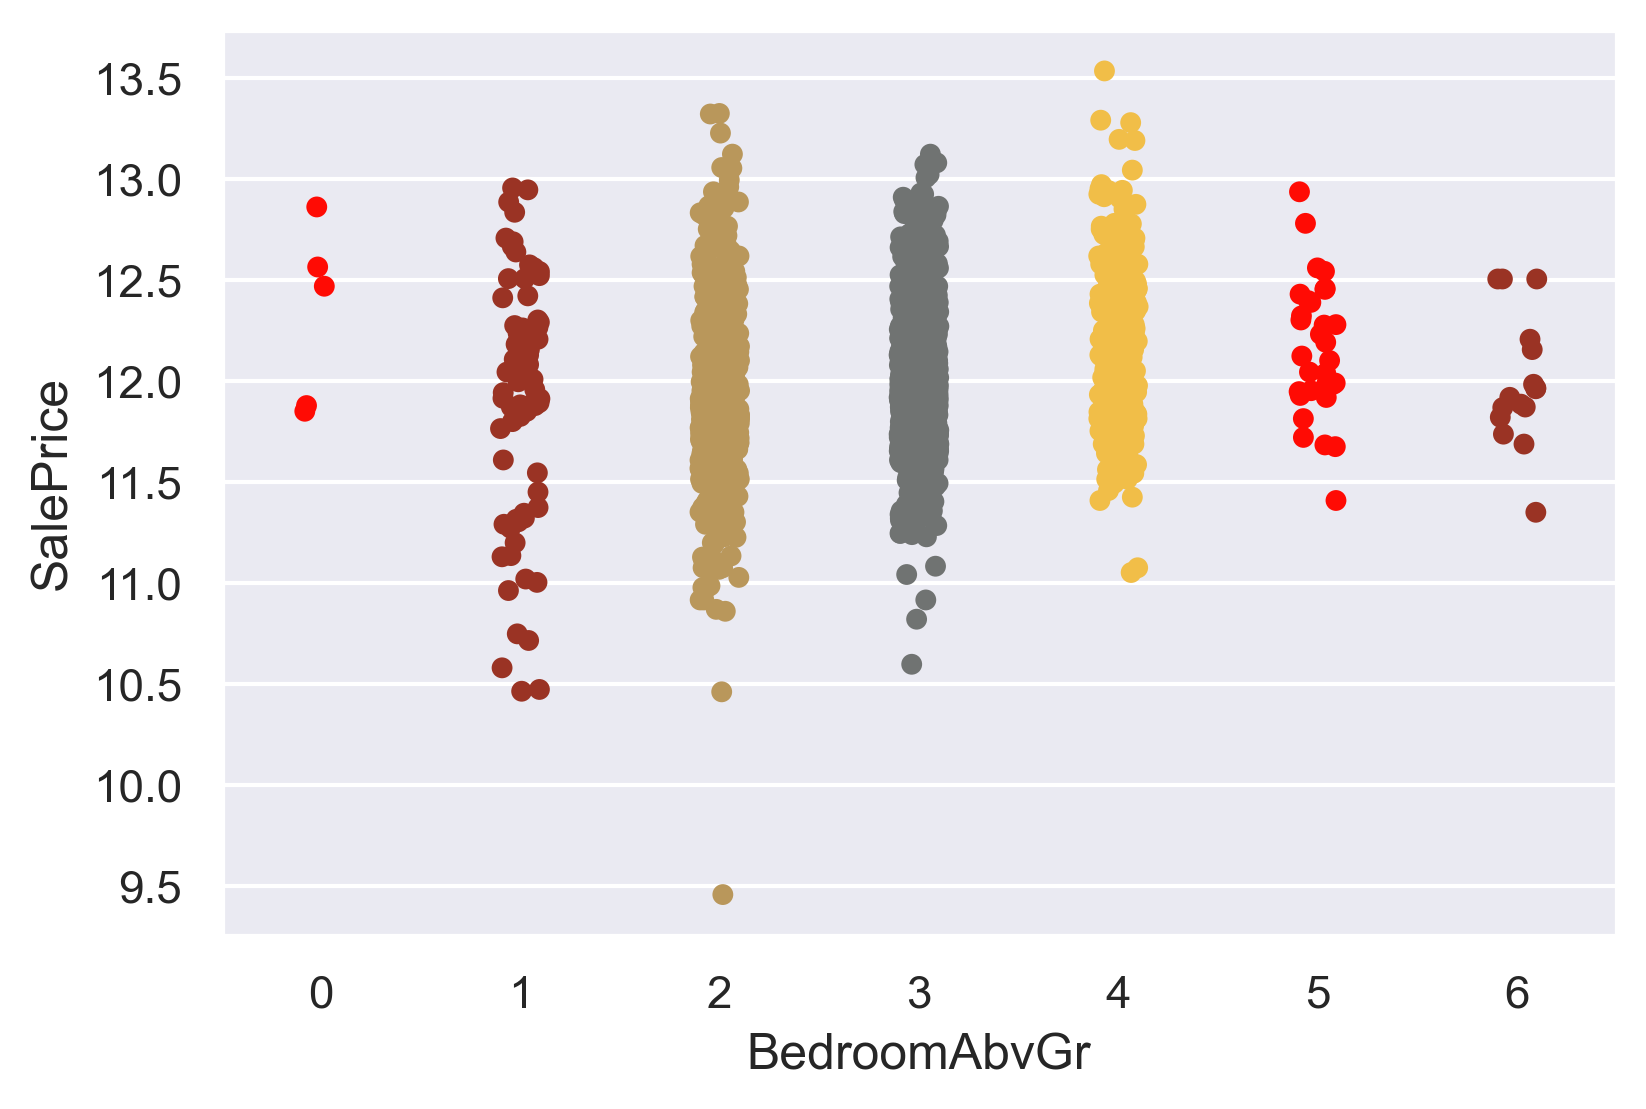

In [84]:
x = hous_trn['BedroomAbvGr']
y = np.log(hous_trn['SalePrice'])
sns.stripplot(x=x, y=y)
plt.show()

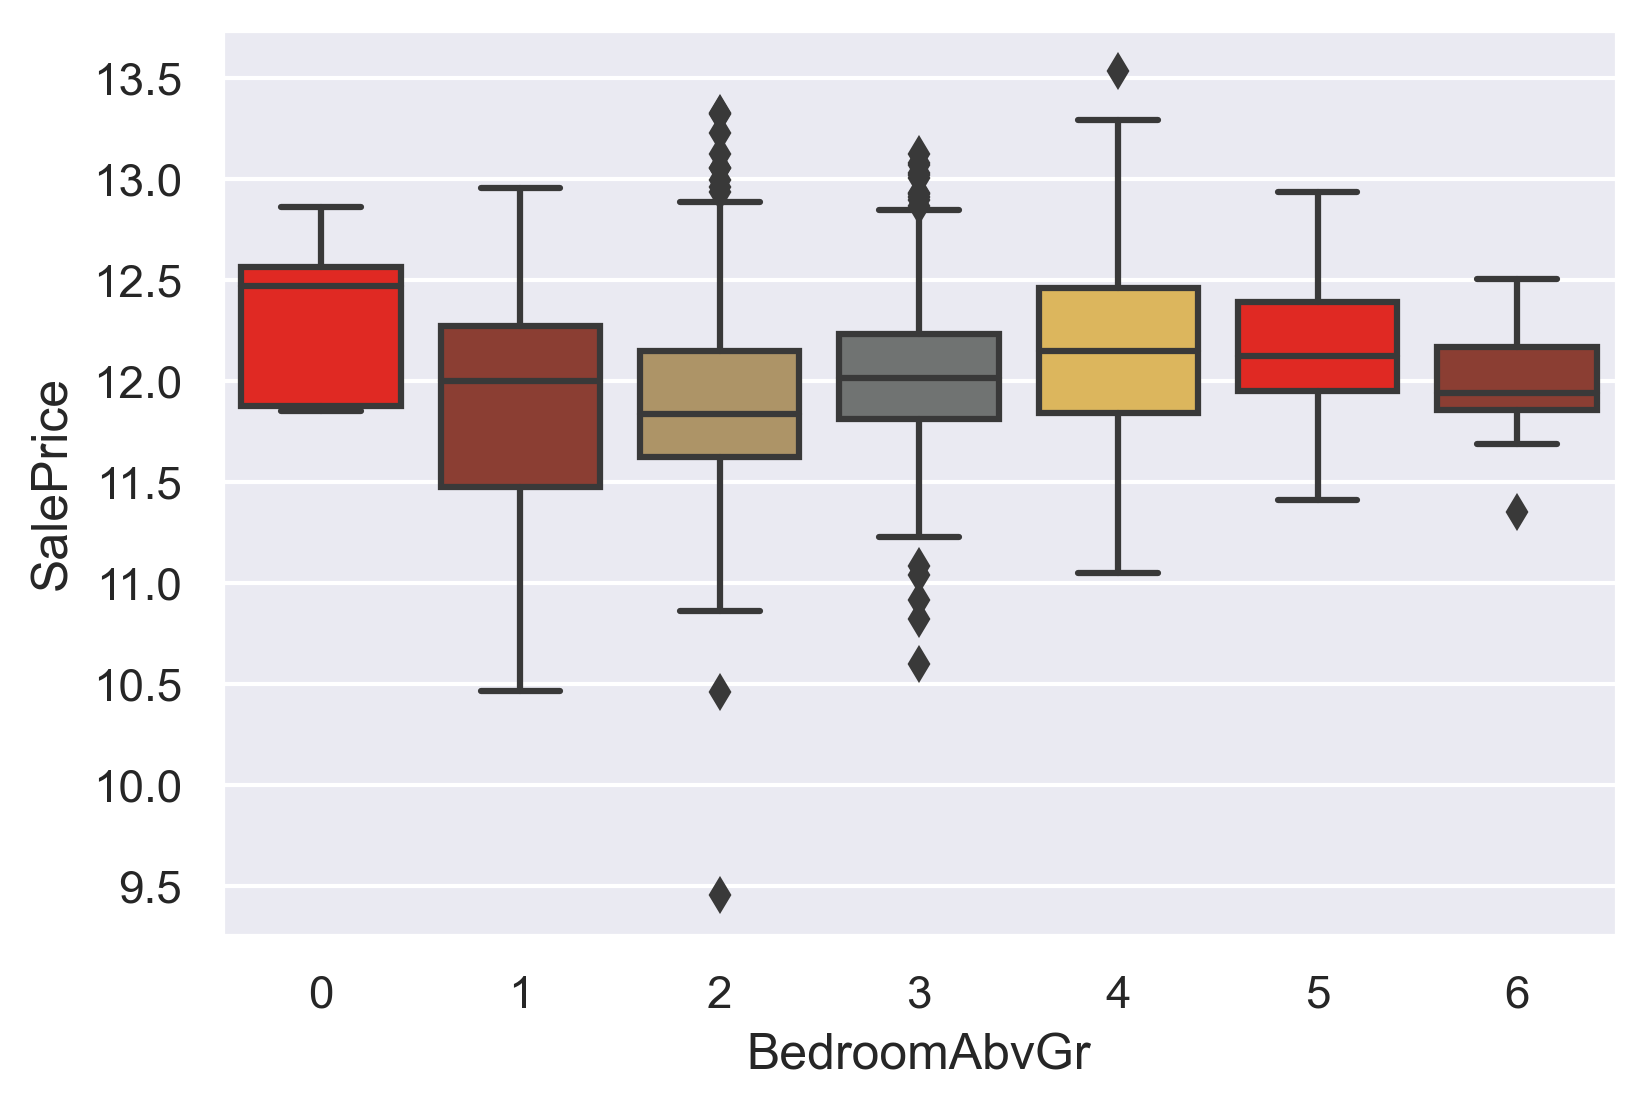

In [85]:
x = hous_trn['BedroomAbvGr']
y = np.log(hous_trn['SalePrice'])
sns.boxplot(x=x, y=y)
plt.show()

In [99]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtBathScore', 'LotFrontage', 'LotArea', 'BedroomAbvGr','Neighborhood']]
transformer = ColumnTransformer([("Cat", OneHotEncoder(drop='first'), ['Neighborhood'])], remainder='passthrough')
X = transformer.fit_transform(X)
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.7413289050048171

In [111]:
X = hous_trn.loc[:, ['BsmtScore', 'BsmtSize', 'BsmtBathScore', 'LotFrontage', 'LotArea', 'BedroomAbvGr', 'Neighborhood']]
transformer = ColumnTransformer([("Cat", OneHotEncoder(drop='first'), ['BedroomAbvGr','Neighborhood'])], remainder='passthrough')
X = transformer.fit_transform(X)
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.7462388204139626

In [110]:
hous_trn['LogGrLivArea'] = np.log(hous_trn['GrLivArea'])

In [112]:
X = hous_trn.loc[:, ['GrLivArea', 'Neighborhood']]
transformer = ColumnTransformer([("Cat", OneHotEncoder(drop='first'), ['Neighborhood'])], remainder='passthrough', sparse_threshold=0)
X = transformer.fit_transform(X)
y = hous_trn['SalePrice']
reg.fit(X, y)
reg.score(X, y)

0.7516854647567714

In [113]:
X = hous_trn.loc[:, ['GrLivArea', 'Neighborhood']]
transformer = ColumnTransformer([("Cat", OneHotEncoder(drop='first'), ['Neighborhood'])], remainder='passthrough', sparse_threshold=0)
X = transformer.fit_transform(X)
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.7592628115915587

In [114]:
X = hous_trn.loc[:, ['Neighborhood']]
transformer = ColumnTransformer([("Cat", OneHotEncoder(drop='first'), ['Neighborhood'])], remainder='passthrough', sparse_threshold=0)
X = transformer.fit_transform(X)
y = hous_trn['SalePrice']/hous_trn['GrLivArea']
reg.fit(X, y)
reg.score(X, y)

0.40363029064482014

In [115]:
X = hous_trn.loc[:, ['Neighborhood']]
transformer = ColumnTransformer([("Cat", OneHotEncoder(drop='first'), ['Neighborhood'])], remainder='passthrough', sparse_threshold=0)
X = transformer.fit_transform(X)
y = np.log(hous_trn['SalePrice']/hous_trn['GrLivArea'])
reg.fit(X, y)
reg.score(X, y)

0.380692235719129

In [116]:
X = hous_trn.loc[:, ['LogGrLivArea', 'Neighborhood']]
transformer = ColumnTransformer([("Cat", OneHotEncoder(drop='first'), ['Neighborhood'])], remainder='passthrough', sparse_threshold=0)
X = transformer.fit_transform(X)
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.7681539895420719

In [117]:
hous_trn['StdGrLivArea'] = stats.zscore(hous_trn['GrLivArea'])

In [118]:
X = hous_trn.loc[:, ['StdGrLivArea', 'Neighborhood']]
transformer = ColumnTransformer([("Cat", OneHotEncoder(drop='first'), ['Neighborhood'])], remainder='passthrough', sparse_threshold=0)
X = transformer.fit_transform(X)
y = np.log(hous_trn['SalePrice'])
reg.fit(X, y)
reg.score(X, y)

0.7592628115915586